In [193]:
import numpy as np 
import pandas as pd

### Context
This is a sales data from an individual company.

#### Content
This dataset includes about 40,000 rows and 15 feature variables. Each row corresponds to a customer infomation, and includes the variables:

**flag:** Whether the customer has bought the target product or not <br/>
**gender:** Gender of the customer <br/>
**education:** Education background of customer <br/>
**house_val:** Value of the residence the customer lives in <br/>
**age:** Age of the customer by group <br/>
**online:** Whether the customer had online shopping experience or not <br/>
**customer_psy:** Variable describing consumer psychology based on the area of residence <br/>
**marriage:** Marriage status of the customer <br/>
**children:** Whether the customer has children or not <br/>
**occupation:** Career information of the customer <br/>
**mortgage:** Housing Loan Information of customers <br/>
**house_own:** Whether the customer owns a house or not <br/>
**region:** Information on the area in which the customer are located <br/>
**car_prob:** The probability that the customer will buy a new car (1 means the maximum possible）<br/>
**fam_income:** Family income Information of the customer (A means the lowest, and L means the highest) <br/>

In [194]:
df = pd.read_csv('sales_data.csv')
df.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H


In [195]:
# shape of dataframe
df.shape

(40000, 15)

In [196]:
# dataframe dtypes for each feature
df.dtypes

flag            object
gender          object
education       object
house_val        int64
age             object
online          object
customer_psy    object
marriage        object
child           object
occupation      object
mortgage        object
house_owner     object
region          object
car_prob         int64
fam_income      object
dtype: object

### Missing values
Replace 'Unknown' categories with null values

In [197]:
# Print unique values in each column

for cat in df.columns:
    print(cat, df[cat].unique())

flag ['Y' 'N']
gender ['M' 'F' 'U']
education ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online ['N' 'Y']
customer_psy ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']
marriage [nan 'Single' 'Married']
child ['U' 'Y' 'N' '0']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['1Low' '2Med' '3High']
house_owner [nan 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
car_prob [1 3 2 7 5 6 9 8 4 0]
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']


In [198]:
# Letter 'U' and '1_Unk' stand for unknown values, replace them with np.nan where needed
df['gender'] = df.gender.replace('U', np.NaN)
df['age'] = df.age.replace('1_Unk', np.NaN)
df['child'] = df.child.replace('U', np.NaN)
df['child'] = df.child.replace('0', np.NaN)

In [199]:
# How many missing values are in each column?
df.isnull().sum()

flag                0
gender           1151
education         741
house_val           0
age              6709
online              0
customer_psy        0
marriage        14027
child            8655
occupation          0
mortgage            0
house_owner      3377
region              0
car_prob            0
fam_income          0
dtype: int64

In [200]:
# relative
df.isnull().sum() / df.shape[0] * 100

flag             0.0000
gender           2.8775
education        1.8525
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage        35.0675
child           21.6375
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.0000
dtype: float64

In [201]:
def category_stackedbar(df, category):
    '''Returns stacked bar plot'''
    return pd.DataFrame(
        df.groupby(category).count()['flag'] / df.groupby(category).count()['flag'].sum() * 100).rename(columns={"flag": "%"}).T.plot(
            kind='bar', 
            stacked=True
    )

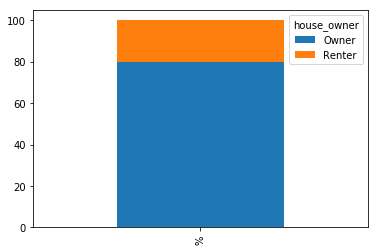

In [202]:
category_stackedbar(df, 'house_owner')

In [203]:
df['house_owner'] = df['house_owner'].fillna(df.mode()['house_owner'][0])

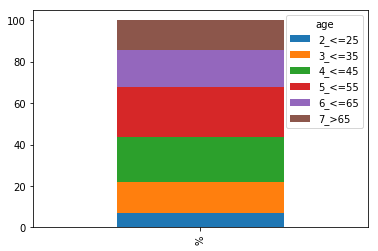

In [204]:
category_stackedbar(df, 'age')

There is no dominant category so I prefer to delete rows with null values in age

In [205]:
df = df.dropna(subset=['age'])

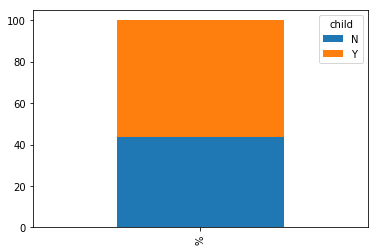

In [206]:
category_stackedbar(df, 'child')

In [207]:
# percentage of null values in *child*
(df.isnull().sum() / df.shape[0] * 100)['child']

19.266468414886905

Same case as age feature, but in this case I am going to drop the column to avoid removing too many observations

In [208]:
df = df.drop('child', axis=1)

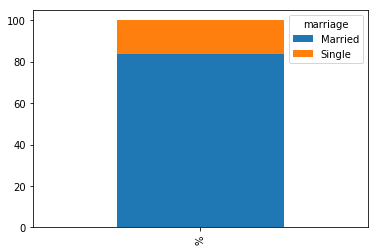

In [209]:
category_stackedbar(df, 'marriage')

More than 80% are Married so I decided to fill null values with the mode

In [210]:
df['marriage'] = df['marriage'].fillna(df.mode()['marriage'][0])

null values from education and gender represent less than 2% of the total rows, so we can just drop them

In [211]:
df = df.dropna(subset=['gender', 'education'])

In [212]:
# checking data cleaning
df.isnull().sum()

flag            0
gender          0
education       0
house_val       0
age             0
online          0
customer_psy    0
marriage        0
occupation      0
mortgage        0
house_owner     0
region          0
car_prob        0
fam_income      0
dtype: int64

Transforming flag and online features to binary integer

In [213]:
df['flag'] = df['flag'].apply(lambda value: 1 if value == 'Y' else 0)
df['online'] = df['online'].apply(lambda value: 1 if value == 'Y' else 0)

### Convert categorical features to a numerical representation

In [214]:
df.dtypes

flag             int64
gender          object
education       object
house_val        int64
age             object
online           int64
customer_psy    object
marriage        object
occupation      object
mortgage        object
house_owner     object
region          object
car_prob         int64
fam_income      object
dtype: object

From the categorical features I'm going to transform the columns education, age, mortgage and fam_income using label encoding because they have a hierarchy. For the other categories I'll treat them as dummy variables.

In [215]:
# explore categories of features with hierarchy
for cat in ['education', 'age', 'mortgage', 'fam_income']:
    print(cat, df[cat].unique())

education ['3. Bach' '2. Some College' '1. HS' '0. <HS' '4. Grad']
age ['7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
mortgage ['1Low' '2Med' '3High']
fam_income ['G' 'J' 'L' 'I' 'D' 'E' 'C' 'A' 'F' 'B' 'H' 'K' 'U']


In [216]:
# Use OrdinalEncoder for ordinal categorical variables
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

In [217]:
df.education = encoder.fit_transform(df.education.values.reshape(-1,1))

In [218]:
df.age = encoder.fit_transform(df.age.values.reshape(-1,1))

In [219]:
df.mortgage = encoder.fit_transform(df.mortgage.values.reshape(-1,1))

In [220]:
df.fam_income = encoder.fit_transform(df.fam_income.values.reshape(-1,1))

In [221]:
df.isnull().sum()

flag            0
gender          0
education       0
house_val       0
age             0
online          0
customer_psy    0
marriage        0
occupation      0
mortgage        0
house_owner     0
region          0
car_prob        0
fam_income      0
dtype: int64

In [222]:
# Use OneHotEncoder for nominal categorical variables
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(dtype=np.int, sparse=True)

In [223]:
dummy_features = ['gender', 'customer_psy', 'occupation', 'house_owner', 'region', 'marriage']

In [224]:
# explore categories of dummy features
for cat in dummy_features:
    print(cat, df[cat].unique())

gender ['F' 'M']
customer_psy ['E' 'C' 'B' 'G' 'F' 'I' 'J' 'D' 'A' 'H' 'U']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
house_owner ['Owner' 'Renter']
region ['Northeast' 'Midwest' 'West' 'South' 'Rest']
marriage ['Married' 'Single']


In [225]:
nominals = pd.DataFrame(onehot.fit_transform(df[['gender', 'customer_psy', 'occupation', 'house_owner', 'region', 'marriage']]).toarray(), \
                        columns=['F','M',\
                                 'E','C','B','G','F','I','J','D','A','H','U', \
                                 'Professional', 'Sales/Service', 'Blue Collar', 'Others', 'Retired','Farm',\
                                 'Owner', 'Renter',\
                                 'Northeast','Midwest','West','South','Rest',\
                                 'Married','Single'])

In [226]:
nominals.head()

,F,M,E,C,B,G,F,I,J,D,...,Farm,Owner,Renter,Northeast,Midwest,West,South,Rest,Married,Single
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [227]:
dfKNN = df.drop(dummy_features, axis=1)

In [231]:
dfKNN = dfKNN.reset_index(drop=True)
dfKNN.head()

,flag,education,house_val,age,online,mortgage,car_prob,fam_income
0,0,3.0,213171,5.0,0,0.0,3,6.0
1,0,2.0,111147,0.0,1,0.0,1,9.0
2,1,2.0,354151,0.0,1,0.0,2,11.0
3,1,3.0,248694,4.0,1,1.0,1,6.0
4,0,3.0,416925,3.0,1,0.0,2,8.0


In [232]:
nominals.head()

,F,M,E,C,B,G,F,I,J,D,...,Farm,Owner,Renter,Northeast,Midwest,West,South,Rest,Married,Single
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [233]:
frames = [dfKNN, nominals]

In [234]:
dfKNN = pd.concat(frames, axis=1)

dfKNN.head()

,flag,education,house_val,age,online,mortgage,car_prob,fam_income,F,M,...,Farm,Owner,Renter,Northeast,Midwest,West,South,Rest,Married,Single
0,0,3.0,213171,5.0,0,0.0,3,6.0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,2.0,111147,0.0,1,0.0,1,9.0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,1,2.0,354151,0.0,1,0.0,2,11.0,0,1,...,1,1,0,0,0,0,0,1,0,1
3,1,3.0,248694,4.0,1,1.0,1,6.0,1,0,...,0,1,0,0,0,0,0,1,1,0
4,0,3.0,416925,3.0,1,0.0,2,8.0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [235]:
dfKNN.isnull().sum()

flag             0
education        0
house_val        0
age              0
online           0
mortgage         0
car_prob         0
fam_income       0
F                0
M                0
E                0
C                0
B                0
G                0
F                0
I                0
J                0
D                0
A                0
H                0
U                0
Professional     0
Sales/Service    0
Blue Collar      0
Others           0
Retired          0
Farm             0
Owner            0
Renter           0
Northeast        0
Midwest          0
West             0
South            0
Rest             0
Married          0
Single           0
dtype: int64

### KNN Model (flag)

Predict whether the customer has bought the target product or not ("flag" column, 2 classes)

In [236]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X = dfKNN.iloc[:, 1:].values
y = dfKNN.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [237]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [238]:
# Training and Predictions using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [239]:
y_pred = classifier.predict(X_test)

In [240]:
# Evaluating the Algorithm using classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1743 1307]
 [1064 2406]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      3050
           1       0.65      0.69      0.67      3470

   micro avg       0.64      0.64      0.64      6520
   macro avg       0.63      0.63      0.63      6520
weighted avg       0.64      0.64      0.63      6520



In [244]:
from sklearn import metrics
k_range = (1, 26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict=knn.predict(X_test)
    scores[k] =metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

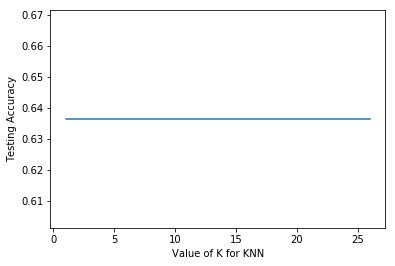

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot therelashionship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [246]:
dfKNN.head()

,flag,education,house_val,age,online,mortgage,car_prob,fam_income,F,M,...,Farm,Owner,Renter,Northeast,Midwest,West,South,Rest,Married,Single
0,0,3.0,213171,5.0,0,0.0,3,6.0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,2.0,111147,0.0,1,0.0,1,9.0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,1,2.0,354151,0.0,1,0.0,2,11.0,0,1,...,1,1,0,0,0,0,0,1,0,1
3,1,3.0,248694,4.0,1,1.0,1,6.0,1,0,...,0,1,0,0,0,0,0,1,1,0
4,0,3.0,416925,3.0,1,0.0,2,8.0,1,0,...,0,1,0,0,0,0,1,0,1,0


### KNN Model (fam_income)

Predict family income class ("fam_income", more than 2 classes)

In [247]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X = dfKNN.drop('fam_income', axis=1).values
y = dfKNN.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [251]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
# Training and Predictions using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [253]:
y_pred = classifier.predict(X_test)

In [254]:
# Evaluating the Algorithm using classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 59  30  32  75  62  34  18   7   1   2   2   1   0]
 [ 35  24  24  55  73  31   9   5   0   5   3   2   0]
 [ 47  38  40  80 107  40  18   4   2   0   3   5   0]
 [ 90  67  45 140 224  91  22  11   2   5   2   5   0]
 [ 96  79  69 235 523 247  99  32  14   8   5  10   0]
 [ 63  43  43 111 344 291 125  35  20  19  14  14   0]
 [ 36  35  29  55 179 167  95  38  21  20   8  22   0]
 [ 16  17  11  21 106 106  63  41  15  24  15  17   0]
 [  9   8   6  14  59  69  41  18  11  21   7  10   0]
 [  8   5   7   9  47  59  30  31  21  27  27  24   0]
 [  6   4   6   8  32  52  30  21  15  24  18  22   0]
 [  2   7   6   5  31  45  30  24  26  31  26  86   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0  21]]
              precision    recall  f1-score   support

         0.0       0.13      0.18      0.15       323
         1.0       0.07      0.09      0.08       266
         2.0       0.13      0.10      0.11       384
         3.0       0.17      0.20      0.19       704
         4.0 

### Linear Regression (house_val)

Predict the value of the residence the customer lives in

In [256]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X = dfKNN.drop('house_val', axis=1).values
y = dfKNN.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [257]:
# Training and Predictions using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
results.head()

,Actual,Predicted
0,0,242200.0
1,698717,505172.0
2,0,535912.0
3,164045,345704.0
4,553284,264580.0


In [262]:
# Evaluating the Algorithm
model.score(X, y)


0.2915498144837544

### Hypothesis Testing


In [263]:
# Compare two population (flag) means (house_val)

# State the hypotheses

# State the conclusion based on the p-value

import statsmodels.api as sm
import numpy as np
import pandas as pd

In [264]:
flagY = dfKNN[dfKNN["flag"] == 1]
flagN = dfKNN[dfKNN["flag"] == 0]

In [265]:
n1 = len(flagY)
mu1 = flagY["house_val"].mean()
sd1 = flagY["house_val"].std()

(n1, mu1, sd1)

(17272, 390702.1751389532, 472165.4914252959)

In [266]:
n2 = len(flagN)
mu2 = flagN["house_val"].mean()
sd2 = flagN["house_val"].std()

(n2, mu2, sd2)

(15328, 242334.7120955115, 347897.99885120546)

In [267]:
sm.stats.ztest(flagY["house_val"].dropna(), flagN["house_val"].dropna())

(31.959026232715242, 4.0477423085336824e-224)

In [283]:
#age ['7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
#age [5., 0., 4., 3., 2., 1.]

age36_45 = dfKNN[dfKNN["age"] == 2.]
age55_more = dfKNN[dfKNN["age"] >= 4.]

print(len(age36_45))
print(len(age55_more))

p36_45 = age36_45[age36_45['flag'] == 1]
p55_more = age55_more[age55_more['flag'] == 1]

print(len(p36_45))
print(len(p55_more))

pp1 = len(p36_45)/len(age36_45)

pp2 = len(p55_more)/len(age55_more)

print(pp1)
print(pp2)

6961
10570
4251
4883
0.610688119523057
0.4619678334910123


In [284]:
# Compare two population (age 36-45 and age > 55) proportions (flag = Y)

# State the hypotheses

# State the conclusion based on the p-value

n1 = 6961
p1 = .61

n2 = 10570
p2 = .46

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

sm.stats.ttest_ind(population1, population2)

(18.696564546296283, 2.977484087313662e-77, 17529.0)

### Identify your Target Audience (most likely to buy the product, flag = Y) 

Based on EDA and Hypothesis testing

What is their:<br/>

**Gender**:<br/>
**Age**:<br/>
**Shopping experience**:<br/> 
**House evaluation**:<br/> 
**Education background**:<br/>
**Occupation**:<br/>
**Mortgage**:<br/>

In [285]:
df7 = pd.read_csv('sales_data.csv')
df7.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H


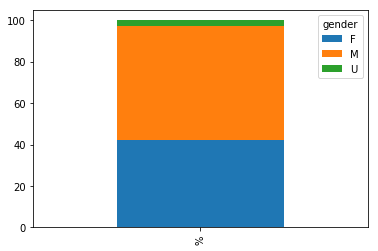

In [286]:
category_stackedbar(df7, 'gender')

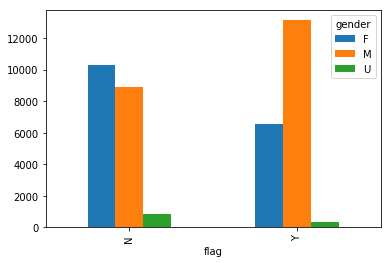

In [287]:
pd.crosstab(df7['flag'],df7['gender']).plot.bar()

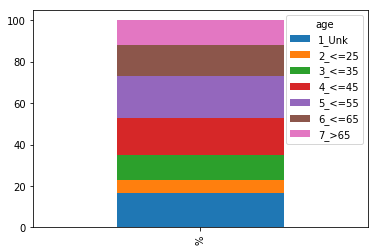

In [288]:
category_stackedbar(df7, 'age')

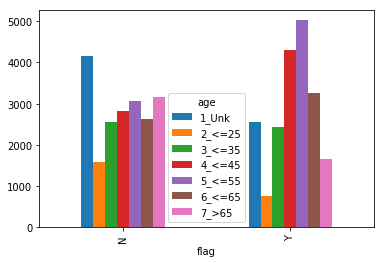

In [289]:
pd.crosstab(df7['flag'],df7['age']).plot.bar()

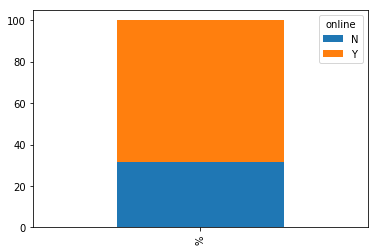

In [290]:
category_stackedbar(df7, 'online')

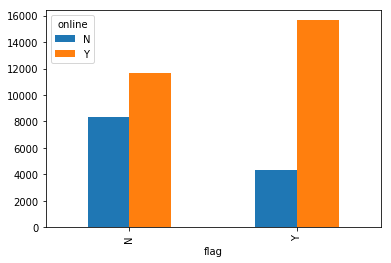

In [291]:
pd.crosstab(df7['flag'],df7['online']).plot.bar()

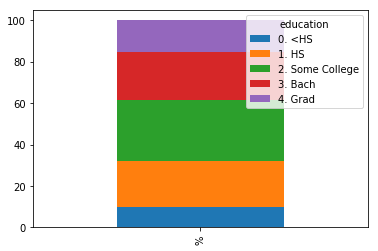

In [292]:
category_stackedbar(df7, 'education')

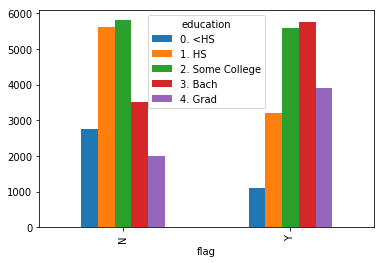

In [293]:
pd.crosstab(df7['flag'],df7['education']).plot.bar()

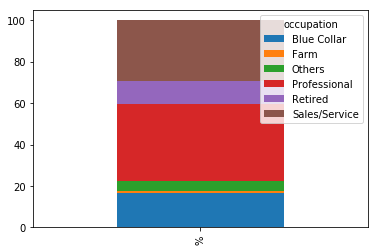

In [294]:
category_stackedbar(df7, 'occupation')

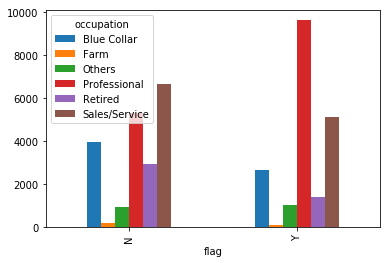

In [295]:
pd.crosstab(df7['flag'],df7['occupation']).plot.bar()

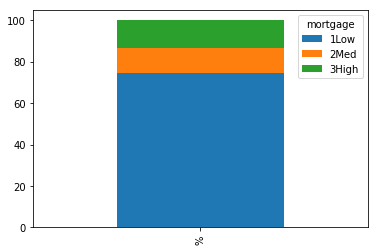

In [296]:
category_stackedbar(df7, 'mortgage')

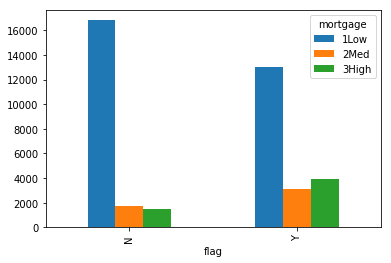

In [297]:
pd.crosstab(df7['flag'],df7['mortgage']).plot.bar()

Based on EDA and Hypothesis testing

What is their:

Gender: Male

Age: 36-55

Shopping experience: Online

House evaluation: High

Education background: At least Some college

Occupation:  Professional

Mortgage: Low